In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from ripple_heterogeneity.utils import (
    functions,
    loading,
    compress_repeated_epochs,
    batch_analysis,
    add_new_deep_sup,
    custom_plots,
)
from ripple_heterogeneity.replay import replay_run, replay_fig, replay_participation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pickle
import seaborn as sns
import nelpy as nel
import nelpy.plotting as npl
import random
from matplotlib.ticker import AutoMinorLocator


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [43]:
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\replay"

df = replay_run.load_results(save_path)


In [6]:
df.basepath.value_counts()

Z:\Data\GirardeauG\Rat11\Rat11-20150331          5759
Z:\Data\GrosmarkAD\Achilles\Achilles_10252013    4635
Z:\Data\GrosmarkAD\Cicero\Cicero_09012014        4083
Z:\Data\GrosmarkAD\Cicero\Cicero_09102014        3993
Z:\Data\GrosmarkAD\Achilles\Achilles_11012013    3971
                                                 ... 
Z:\Data\AYAold\AYA4\day150804                      56
Z:\Data\GirardeauG\Rat11\Rat11-20150325            35
Z:\Data\Kenji\ec014.628_645                        17
Z:\Data\Kenji\ec013.588_604                        14
Z:\Data\GirardeauG\Rat11\Rat11-20150321             2
Name: basepath, Length: 63, dtype: int64

In [44]:
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay'
save_path_cur_analysis = r"Z:\home\ryanh\projects\ripple_heterogeneity\replay_participation_test"
batch_analysis.run(
    df,
    save_path_cur_analysis,
    replay_participation.run,
    parallel=True,
    verbose=True,
    overwrite=True,
    skip_if_error=False,
    replay_df=df,
    replay_save_path=save_path,
    alpha=0.05,
    min_spk_count=0
)
# read back in
save_path_cur_analysis = r"Z:\home\ryanh\projects\ripple_heterogeneity\replay_participation_test"
sessions = glob.glob(save_path_cur_analysis + os.sep + "*.pkl")
par_df = pd.DataFrame()
for session in sessions:
    with open(session, "rb") as f:
        results = pickle.load(f)
    par_df = pd.concat([par_df, results])

par_df = add_new_deep_sup.deep_sup_from_deepSuperficialDistance(par_df)


100%|██████████| 88/88 [01:15<00:00,  1.16it/s] 


In [83]:
par_df

,avg_fr,replay_fr,ripple_fr,non_replay_fr,replay_par,ripple_par,non_replay_par,forward_replay_par,reverse_replay_par,epoch,epoch_i,epoch_rel_i,UID,deepSuperficialDistance,n_replays,n_ripples,basepath,deepSuperficial
0,0.025439,0.727167,0.076020,0.080510,0.142857,0.012069,0.008264,0.0,0.2,sleep,0,-1,1,-150.000000,7,580,Z:\Data\AYAold\AB1\day1,Deep
1,0.303509,0.727167,1.357503,3.622955,0.142857,0.167241,0.305785,0.5,0.0,sleep,0,-1,9,0.000000,7,580,Z:\Data\AYAold\AB1\day1,middle
2,0.277193,0.727167,0.619022,0.724591,0.142857,0.082759,0.074380,0.0,0.2,sleep,0,-1,10,150.000000,7,580,Z:\Data\AYAold\AB1\day1,Superficial
3,10.793867,26.905177,23.577119,49.513719,0.857143,0.825862,0.942149,1.0,0.8,sleep,0,-1,12,0.000000,7,580,Z:\Data\AYAold\AB1\day1,middle
4,0.637720,2.181501,2.085125,3.622955,0.285714,0.224138,0.264463,0.5,0.2,sleep,0,-1,15,100.000000,7,580,Z:\Data\AYAold\AB1\day1,Superficial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1.566915,2.582645,2.665782,5.957949,0.500000,0.280245,0.384181,0.5,0.5,sleep,3,1,24,-241.016208,4,653,Z:\Data\OMLproject\OML18\day1,Deep
64,1.313141,5.165289,2.115848,4.621587,0.500000,0.248086,0.338983,0.5,0.5,sleep,3,1,26,-214.057883,4,653,Z:\Data\OMLproject\OML18\day1,Deep
65,1.256420,0.000000,3.821575,8.853401,0.000000,0.396631,0.525424,0.0,0.0,sleep,3,1,27,-73.526467,4,653,Z:\Data\OMLproject\OML18\day1,Deep
66,0.647967,7.747934,2.693745,5.790904,0.750000,0.283308,0.367232,0.5,1.0,sleep,3,1,28,-214.057883,4,653,Z:\Data\OMLproject\OML18\day1,Deep


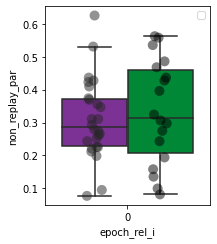

In [92]:
plt.figure(
    figsize=functions.set_size("thesis", fraction=.5, subplots=(2, 1)), edgecolor=None
)

group_colors = {
    "Deep": "#7b3294",
    "Superficial": "#008837"
}
sns.set_palette(sns.color_palette(group_colors.values()))

ax = plt.gca()
basepath = r"Z:\Data\GrosmarkAD\Achilles\Achilles_10252013"
sns.boxplot(
    x="epoch_rel_i",
    y="non_replay_par",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    saturation=1,
    showfliers=False,
    data=par_df[(par_df.basepath == basepath) & (par_df.epoch_rel_i == 0)],
    ax=ax
)
sns.stripplot(
    x="epoch_rel_i",
    y="non_replay_par",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    dodge=True,
    data=par_df[(par_df.basepath == basepath) & (par_df.epoch_rel_i == 0)],
    size=10,
    color="k",
    linewidth=0,
    alpha=0.5,
    ax=ax,
)
plt.legend("")

In [204]:
dist_bins

array([-150, -140, -130, -120, -110, -100,  -90,  -80,  -70,  -60,  -50,
        -40,  -30,  -20,  -10,    0,   10,   20,   30,   40,   50,   60,
         70,   80,   90,  100,  110,  120,  130,  140,  150])

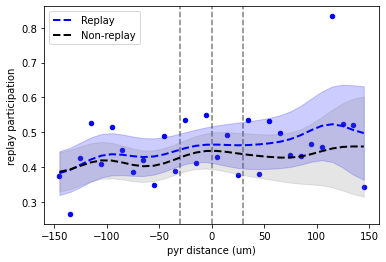

In [205]:
from scipy.ndimage import gaussian_filter1d

temp_par_df = par_df[(par_df.n_replays > 1) & (par_df.epoch_rel_i == 0)]

bin_width = 10
dist_bins = np.arange(-150, 160, bin_width)

avg_replay_par = []
median_replay_par = []
std_replay_par = []
avg_non_replay_par = []
std_non_replay_par = []
for start, end in zip(dist_bins[:-1], dist_bins[1:]):
    idx = (temp_par_df.deepSuperficialDistance.values >= start) & (
        temp_par_df.deepSuperficialDistance.values < end
    )
    avg_replay_par.append(np.nanmean(temp_par_df[idx].replay_par))
    median_replay_par.append(np.nanmedian(temp_par_df[idx].replay_par))
    std_replay_par.append(
        np.nanstd(temp_par_df[idx].replay_par) / np.sqrt(len(temp_par_df[idx]))
    )

    avg_non_replay_par.append(np.nanmean(temp_par_df[idx].non_replay_par))
    std_non_replay_par.append(
        np.nanstd(temp_par_df[idx].non_replay_par) / np.sqrt(len(temp_par_df[idx]))
    )

    plt.scatter(start + bin_width / 2, np.nanmean(temp_par_df[idx].replay_par), s=20, c="blue")
    # plt.scatter(start + bin_width / 2, temp_par_df[idx].non_replay_par.mean(), s=20, c="grey")

    # plt.scatter(start + bin_width / 2, temp_par_df[idx].replay_par.median(), s=20, c="k")

avg_replay_par = np.array(avg_replay_par)
median_replay_par = np.array(median_replay_par)
std_replay_par = np.array(std_replay_par)
avg_non_replay_par = np.array(avg_non_replay_par)
std_non_replay_par = np.array(std_non_replay_par)

avg_replay_par = gaussian_filter1d(avg_replay_par, sigma=bin_width / 4)
median_replay_par = gaussian_filter1d(median_replay_par, sigma=bin_width / 4)
std_replay_par = gaussian_filter1d(std_replay_par, sigma=bin_width / 4)
avg_non_replay_par = gaussian_filter1d(avg_non_replay_par, sigma=bin_width / 4)
std_non_replay_par = gaussian_filter1d(std_non_replay_par, sigma=bin_width / 4)

plt.plot(dist_bins[:-1] + bin_width / 2, avg_replay_par, c="blue", linewidth=2,linestyle="--", label="Replay")
plt.fill_between(
    dist_bins[:-1] + bin_width / 2,
    avg_replay_par - std_replay_par,
    avg_replay_par + std_replay_par,
    color="blue",
    alpha=0.2,
)

plt.plot(dist_bins[:-1] + bin_width / 2, avg_non_replay_par, c="k", linewidth=2,linestyle="--", label="Non-replay")
plt.fill_between(
    dist_bins[:-1] + bin_width / 2,
    avg_non_replay_par - std_non_replay_par,
    avg_non_replay_par + std_non_replay_par,
    color="grey",
    alpha=0.2,
)

# plt.plot(
#     dist_bins[:-1] + bin_width / 2,
#     median_replay_par,
#     c="k",
#     linewidth=2,
#     linestyle="--",
# )
# plt.fill_between(
#     dist_bins[:-1] + bin_width / 2,
#     median_replay_par - 1.253 * std_replay_par,
#     median_replay_par + 1.253 * std_replay_par,
#     color="blue",
#     alpha=0.2,
# )

plt.axvline(0, c="k", linestyle="--", zorder=-1000, alpha=0.5)
plt.axvline(-30, c="k", linestyle="--", zorder=-1000, alpha=0.5)
plt.axvline(30, c="k", linestyle="--", zorder=-1000, alpha=0.5)
plt.ylabel("replay participation")
plt.xlabel("pyr distance (um)")
plt.legend()

<AxesSubplot:xlabel='deepSuperficialDistance_cut', ylabel='replay_par'>

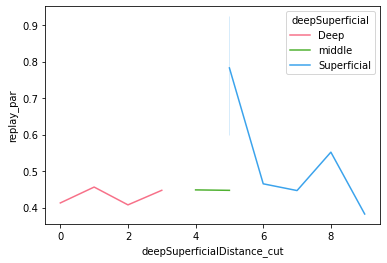

In [211]:
# replay_par = par_df[(par_df.basepath == basepath) & (par_df.epoch_rel_i == 0)].replay_par
par_df["deepSuperficialDistance_cut"] = par_df.deepSuperficialDistance.values
par_df.loc[(par_df.deepSuperficialDistance_cut < -150) | (par_df.deepSuperficialDistance_cut > 150), "deepSuperficialDistance_cut"] = np.nan

par_df["deepSuperficialDistance_cut"] = pd.cut(par_df.deepSuperficialDistance_cut, bins=10, labels=False)

sns.lineplot(x="deepSuperficialDistance_cut", y="replay_par",
            hue="deepSuperficial",
             data=par_df[(par_df.epoch_rel_i == 0)])
# plt.xlim(-200,200)

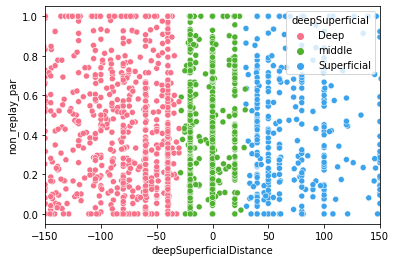

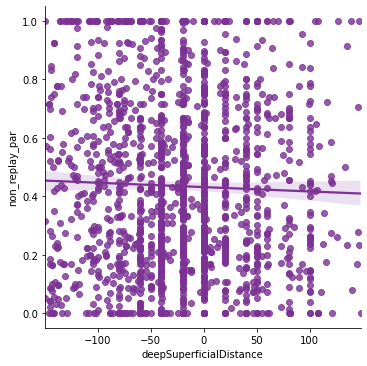

In [209]:
sns.scatterplot(
    x="deepSuperficialDistance",
    y="non_replay_par",
    hue="deepSuperficial",
    data=par_df[(par_df.epoch_rel_i == 0)],
)
plt.xlim(-150,150)


g = sns.lmplot(
    data=par_df[(par_df.epoch_rel_i == 0) & (par_df.deepSuperficialDistance >-150) & (par_df.deepSuperficialDistance < 150)],
    x="deepSuperficialDistance",
    y="non_replay_par",
)

In [216]:
par_df.keys()
par_df['replay_ratio'] = par_df.replay_par / par_df.non_replay_par

In [231]:
par_df
import scipy.stats as stats

for basepath in par_df.basepath.unique():
    # perform two-sided test. You can use 'greater' or 'less' for one-sided test
    x = par_df[(par_df.basepath == basepath) & (par_df.deepSuperficial == "Deep") & (par_df.epoch_rel_i == 0)]["replay_ratio"].values
    y = par_df[(par_df.basepath == basepath) & (par_df.deepSuperficial == "Superficial") & (par_df.epoch_rel_i == 0)]["replay_ratio"].values
    if np.isnan(x).all() or np.isnan(y).all():
        # print(basepath, "no data")
        continue
    x_ = x[~np.isnan(x)]
    y_ = y[~np.isnan(y)]
    
    m1 = stats.mannwhitneyu(
        x=x_,
        y=y_,
        alternative="less",
    )
    print(basepath, m1)

Z:\Data\AYAold\AB1\day1 MannwhitneyuResult(statistic=144.5, pvalue=0.21447302760553938)
Z:\Data\AYAold\AB3\AB3_42_46 MannwhitneyuResult(statistic=15.0, pvalue=0.1739926811487128)
Z:\Data\AYAold\AB3\AB3_58_59 MannwhitneyuResult(statistic=143.5, pvalue=0.7697610789211792)
Z:\Data\AYAold\AYA6\day17 MannwhitneyuResult(statistic=114.0, pvalue=0.1717705410268373)
Z:\Data\AYAold\AYA6\day19 MannwhitneyuResult(statistic=94.0, pvalue=0.6801335365742136)
Z:\Data\AYAold\AYA6\day20 MannwhitneyuResult(statistic=160.5, pvalue=0.9999493493197594)
Z:\Data\AYAold\AYA7\day20 MannwhitneyuResult(statistic=2.0, pvalue=0.2789881266122901)
Z:\Data\AYAold\AYA7\day27 MannwhitneyuResult(statistic=4.0, pvalue=0.17142857142857143)
Z:\Data\AYAold\AYA9\day12 MannwhitneyuResult(statistic=75.5, pvalue=0.1408719170583393)
Z:\Data\AYAold\AYA9\day17 MannwhitneyuResult(statistic=28.0, pvalue=0.09794121942486356)
Z:\Data\GirardeauG\Rat08\Rat08-20130708 MannwhitneyuResult(statistic=0.5, pvalue=0.3085375387259869)
Z:\Data\Gi

In [8]:
basepath = r"Z:\Data\GrosmarkAD\Achilles\Achilles_10252013"
temp_df = replay_participation.run(
    basepath,
    replay_df=df,
    replay_save_path=save_path,
    alpha=0.05,
    partic_pad=0.05,
    min_spk_count=200,
)

In [10]:
par_df = temp_df

In [11]:
par_df = add_new_deep_sup.deep_sup_from_deepSuperficialDistance(par_df)


In [ ]:
# par_df.replay_par

import scipy.stats as stats

# perform two-sided test. You can use 'greater' or 'less' for one-sided test
stats.mannwhitneyu(
    x=par_df[par_df.deepSuperficial == "Deep"]["replay_par"],
    y=par_df[par_df.deepSuperficial == "Superficial"]["replay_par"],
    alternative="two-sided",
)


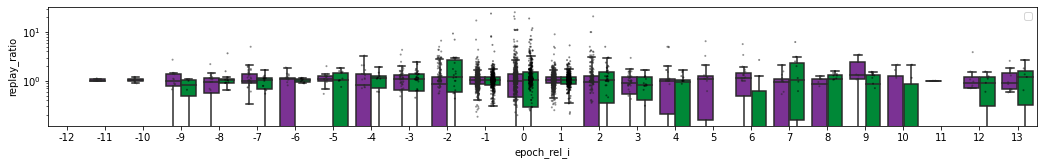

In [234]:
plt.figure(
    figsize=functions.set_size("thesis", fraction=3, subplots=(1, 5)), edgecolor=None
)

group_colors = {
    "Deep": "#7b3294",
    "Superficial": "#008837"
}
sns.set_palette(sns.color_palette(group_colors.values()))

ax = plt.gca()

sns.boxplot(
    x="epoch_rel_i",
    y="replay_ratio",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    saturation=1,
    showfliers=False,
    data=par_df,
    ax=ax
)
sns.stripplot(
    x="epoch_rel_i",
    y="replay_ratio",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    dodge=True,
    data=par_df,
    size=2,
    color="k",
    linewidth=0,
    alpha=0.5,
    ax=ax,
)
plt.legend("")
plt.yscale("log")